In [1]:
# import pandas as pd
# import nltk
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import matplotlib.pyplot as plt
# import seaborn as sns



# # Download VADER lexicon if not already done
# nltk.download('vader_lexicon')

# # Load cleaned CSV files
# videos = pd.read_csv("videos_cleaned_text.csv")
# comments = pd.read_csv("comments_cleaned_text.csv")
# replies = pd.read_csv("replies_cleaned_text.csv")

# # Initialize VADER
# vader = SentimentIntensityAnalyzer()

# # Function to get compound score (handles empty or NaN)
# def vader_score(text):
#     if isinstance(text, str) and text.strip():
#         return vader.polarity_scores(text)['compound']
#     return 0.0  # Neutral if no valid text

# # Sentiment classification function
# def classify_sentiment(score):
#     if score >= 0.05:
#         return 'positive'
#     elif score <= -0.05:
#         return 'negative'
#     else:
#         return 'neutral'

# Function to analyze sentiment on a DataFrame column
def analyze_sentiment(df, text_column, dataset_name):
    df['vader_score'] = df[text_column].apply(vader_score)
    df['sentiment'] = df['vader_score'].apply(classify_sentiment)
    
    print(f"\n{dataset_name} Sentiment Sample:")
    display(df[[text_column, 'vader_score', 'sentiment']].head())

    # Print sentiment summary counts (percentages)
    print(f"{dataset_name} sentiment distribution (%):")
    print(df['sentiment'].value_counts(normalize=True).mul(100).round(2))

#     return df

# # === Analyze Videos ===
# videos = analyze_sentiment(videos, 'cleaned_description', 'Videos')

# # === Analyze Comments ===
# comments = analyze_sentiment(comments, 'cleaned_text', 'Comments')

# # Analyze Replies
# replies = analyze_sentiment(replies, 'cleaned_text', 'Replies')

# # Save results with sentiment scores
# videos.to_csv("videos_with_sentiment.csv", index=False)
# comments.to_csv("comments_with_sentiment.csv", index=False)
# replies.to_csv("replies_with_sentiment.csv", index=False)

# print("\nSentiment analysis completed and saved for videos, comments, and replies!")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



📊 Videos Sentiment Sample:


,cleaned_description,vader_score,sentiment
0,video well dive inspiring journey sabrina carp...,0.9643,positive
1,first people use link get month free trial ski...,0.5574,positive
2,sabrina carpenter went disney channel star pop...,0.9652,positive
3,welcome celebrity channel get know singer actr...,0.8225,positive
4,wan know sabrina carpenter dated get fact righ...,0.0516,positive


Videos sentiment distribution (%):
sentiment
positive    76.25
neutral     14.37
negative     9.38
Name: proportion, dtype: float64

📊 Comments Sentiment Sample:


,cleaned_text,vader_score,sentiment
0,emergency good movie watch,0.0772,positive
1,girl toronto,0.0000,neutral
2,maya hart gay handle rilaya since show made ri...,-0.5994,negative
3,gross always trying force sexuality others pat...,-0.7783,negative
4,gross force sexuality someone else weird,-0.5859,negative


Comments sentiment distribution (%):
sentiment
positive    44.42
neutral     39.86
negative    15.71
Name: proportion, dtype: float64

📊 Replies Sentiment Sample:


,cleaned_text,vader_score,sentiment
0,whole disney actress think become singer bulls...,-0.6369,negative
1,part hollywood bound make big certain period t...,0.2732,positive
2,agree,0.3612,positive
3,appreciate,0.4019,positive
4,yes,0.4019,positive


Replies sentiment distribution (%):
sentiment
neutral     41.73
positive    40.01
negative    18.25
Name: proportion, dtype: float64

✅ Sentiment analysis completed and saved for videos, comments, and replies!


In [8]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if needed
nltk.download('vader_lexicon')

# Load word lists
with open('positive-words.txt', 'r', encoding='utf-8', errors='ignore') as f:
    pos_words = set(line.strip() for line in f if line.strip())

with open('negative-words.txt', 'r', encoding='utf-8', errors='ignore') as f:
    neg_words = set(line.strip() for line in f if line.strip())

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function: Compute sentiment
def classify_sentiment(text):
    if pd.isnull(text):
        return 0, 'neutral'

    text = str(text)
    tokens = text.lower().split()
    vader_score = sia.polarity_scores(text)['compound']
    pos_count = sum(1 for t in tokens if t in pos_words)
    neg_count = sum(1 for t in tokens if t in neg_words)
    count_score = pos_count - neg_count

    # Final score: Weighted sum (optional adjustment)
    final_score = vader_score + 0.2 * count_score

    # Classify
    if final_score >= 0.6:
        label = 'Extremely Positive'
    elif final_score >= 0.05:
        label = 'Mildly Positive'
    elif final_score > -0.05:
        label = 'Neutral'
    elif final_score > -0.6:
        label = 'Mildly Negative'
    else:
        label = 'Extremely Negative'

    return final_score, label

# Function: Apply to DataFrame
def apply_sentiment(df, text_column):
    df['vader_score'], df['sentiment_label'] = zip(*df[text_column].apply(classify_sentiment))
    return df

# Process Files

# Comments
comments = pd.read_csv("comments_with_sentiment.csv")
comments = apply_sentiment(comments, text_column='text')
comments.to_csv("comments_with_sentiment_updated.csv", index=False)

# Replies
replies = pd.read_csv("replies_with_sentiment.csv")
replies = apply_sentiment(replies, text_column='text')
replies.to_csv("replies_with_sentiment_updated.csv", index=False)

# Videos
videos = pd.read_csv("videos_with_sentiment.csv")
videos = apply_sentiment(videos, text_column='description')
videos.to_csv("videos_with_sentiment_updated.csv", index=False)

print("Sentiment analysis completed. Updated CSVs saved.")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Sentiment analysis completed. Updated CSVs saved.


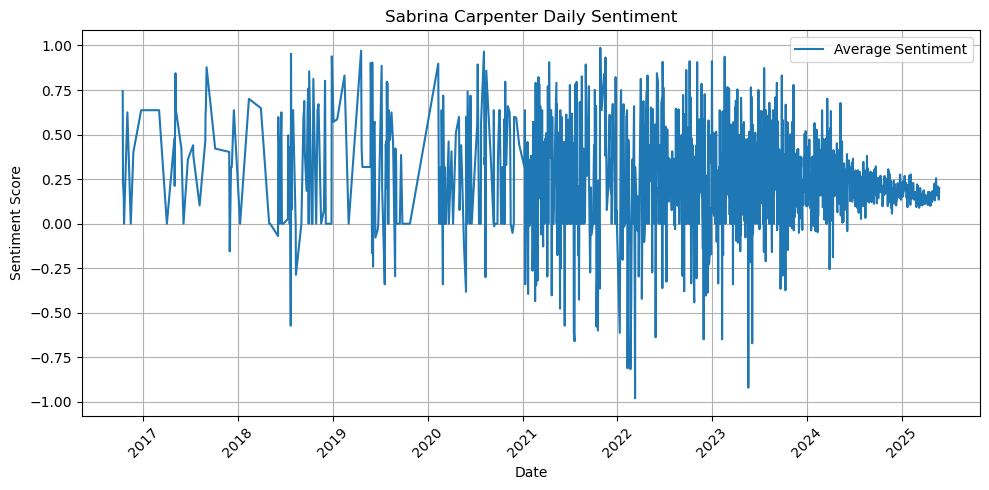

In [2]:
# Assuming 'comments' already has 'vader_score' and 'published_at' column
comments['published_at'] = pd.to_datetime(comments['published_at'])
comments['date'] = comments['published_at'].dt.date

# Daily average sentiment
daily_sentiment = comments.groupby('date')['vader_score'].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
plt.plot(daily_sentiment['date'], daily_sentiment['vader_score'], label='Average Sentiment')
plt.title("Sabrina Carpenter Daily Sentiment")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
def plot_sentiment_analysis(df, label, time_col):
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df = df.dropna(subset=[time_col])  # Remove rows with invalid/missing timestamps

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"{label} Sentiment Analysis", fontsize=16)

    # Histogram
    sns.countplot(data=df, x='sentiment', ax=axes[0], palette='Set2', order=['positive', 'neutral', 'negative'])
    axes[0].set_title("Sentiment Distribution")
    axes[0].set_xlabel("Sentiment")
    axes[0].set_ylabel("Count")

    # Sentiment over time
    df['date'] = df[time_col].dt.date
    sentiment_timeline = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)
    sentiment_timeline.plot(ax=axes[1], marker='o')

    axes[1].set_title("Sentiment Over Time")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Number of Entries")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


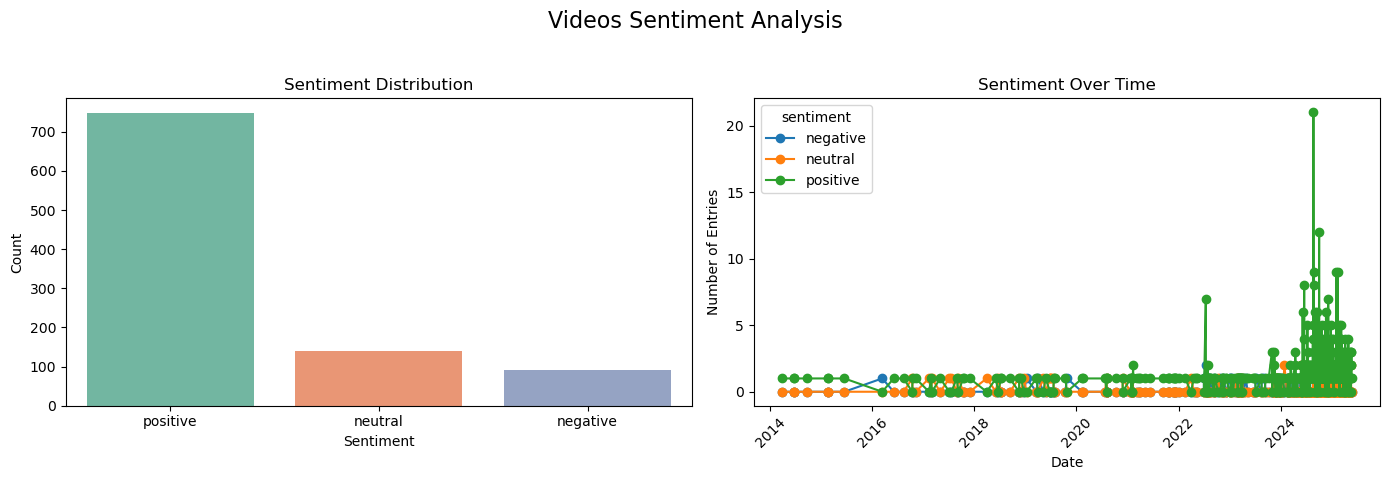

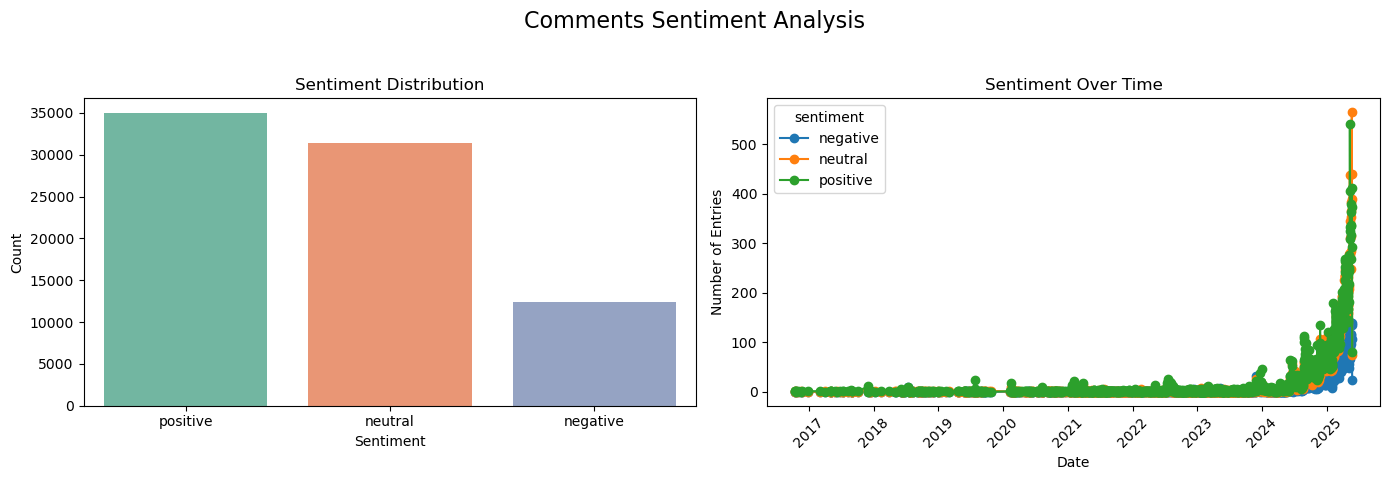

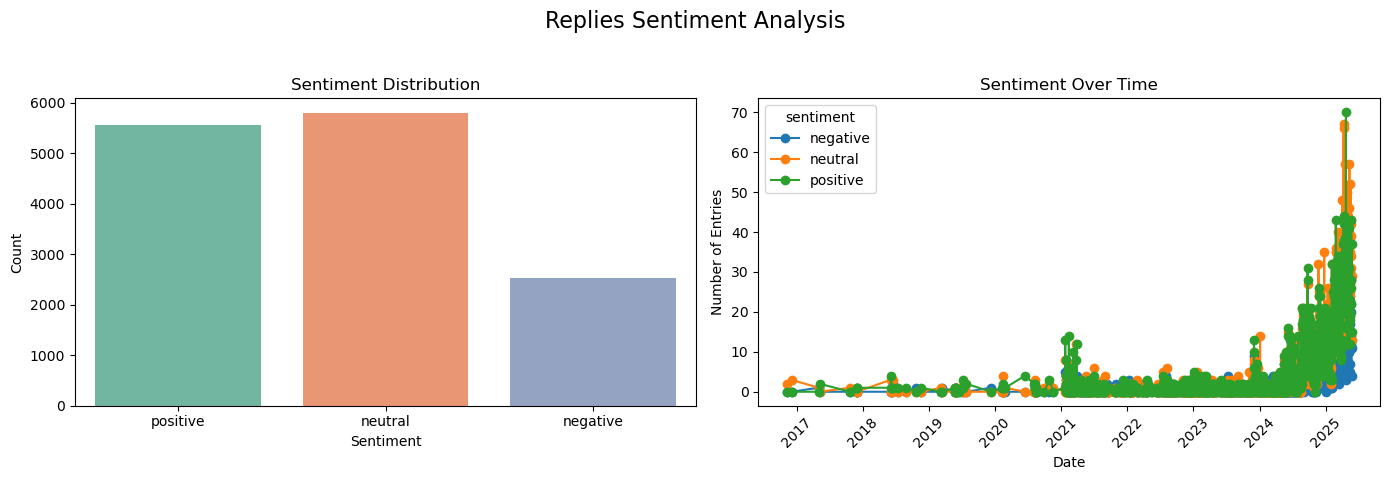

In [5]:
plot_sentiment_analysis(videos, "Videos", "published")
plot_sentiment_analysis(comments, "Comments", "published_at")
plot_sentiment_analysis(replies, "Replies", "published_at")

In [6]:
# === Print Column Names ===
print("Column names in videos_with_sentiment.csv:")
print(videos.columns.tolist())

print("\nColumn names in comments_with_sentiment.csv:")
print(comments.columns.tolist())

print("\nColumn names in replies_with_sentiment.csv:")
print(replies.columns.tolist())

📁 Column names in videos_with_sentiment.csv:
['video_id', 'title', 'channel', 'channelId', 'published', 'description', 'tags', 'mentions', 'hashtags', 'views', 'source_folder', 'cleaned_description', 'vader_score', 'sentiment']

📁 Column names in comments_with_sentiment.csv:
['comment_id', 'video_id', 'author', 'published_at', 'text', 'source_folder', 'cleaned_text', 'vader_score', 'sentiment', 'date']

📁 Column names in replies_with_sentiment.csv:
['video_id', 'in_reply_to', 'parent_author', 'author', 'published_at', 'text', 'source_folder', 'cleaned_text', 'vader_score', 'sentiment']
